# Proyecto I 
* Monica Alfaro Parrales
* Adrián Ramírez Mattey
* Gilberth Rodríguez Mejías 

## Carga del dataset "Pima Indians Diabetes Database"

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [43]:
data = pd.read_csv('diabetes.csv')
print("data head")
display(data.head())
print("data describe")
display(data.describe())
display(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

data head


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


data describe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Análisis de datos
1 = Diabetes

0 = No diabetes

### Gráficos de disperisón 

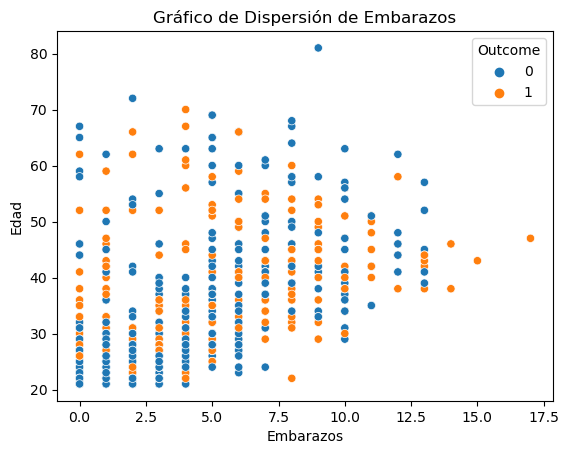

In [44]:
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Embarazos")
plt.xlabel("Embarazos")
plt.ylabel("Edad")
plt.show()


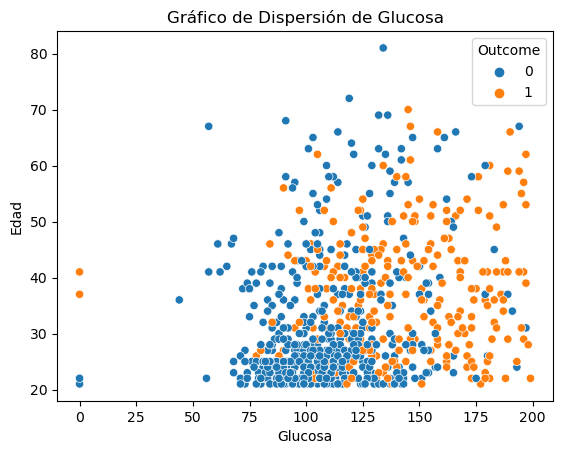

In [45]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Glucosa")
plt.xlabel("Glucosa")
plt.ylabel("Edad")
plt.show()


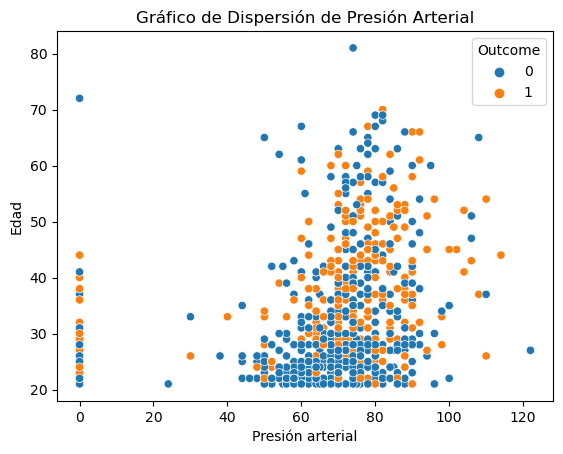

In [46]:
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Presión Arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Edad")
plt.show()


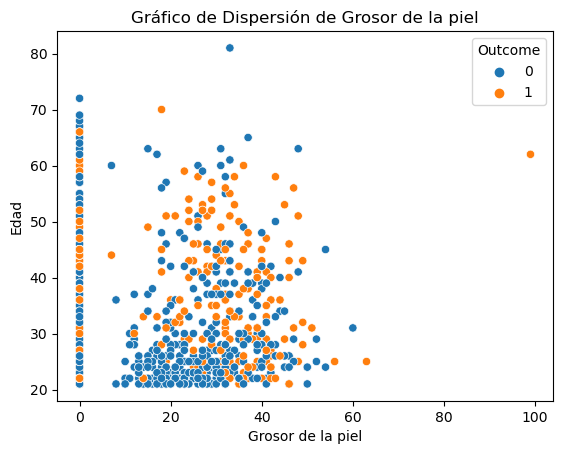

In [47]:
sns.scatterplot(x='SkinThickness', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Grosor de la piel")
plt.xlabel("Grosor de la piel")
plt.ylabel("Edad")
plt.show()


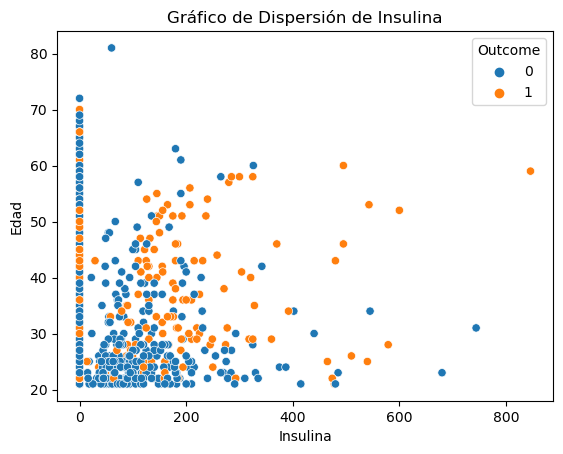

In [48]:
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Insulina")
plt.xlabel("Insulina")
plt.ylabel("Edad")
plt.show()


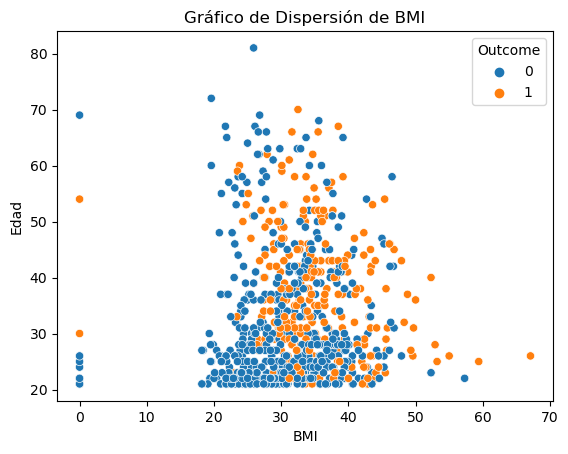

In [49]:
sns.scatterplot(x='BMI', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de BMI")
plt.xlabel("BMI")
plt.ylabel("Edad")
plt.show()


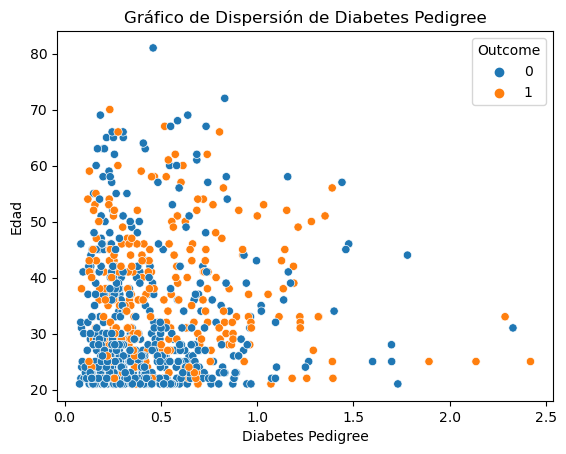

In [50]:
sns.scatterplot(x='DiabetesPedigreeFunction', y='Age', hue='Outcome', data=data, )

# Mostrar el gráfico
plt.title("Gráfico de Dispersión de Diabetes Pedigree")
plt.xlabel("Diabetes Pedigree")
plt.ylabel("Edad")
plt.show()



### Histogramas

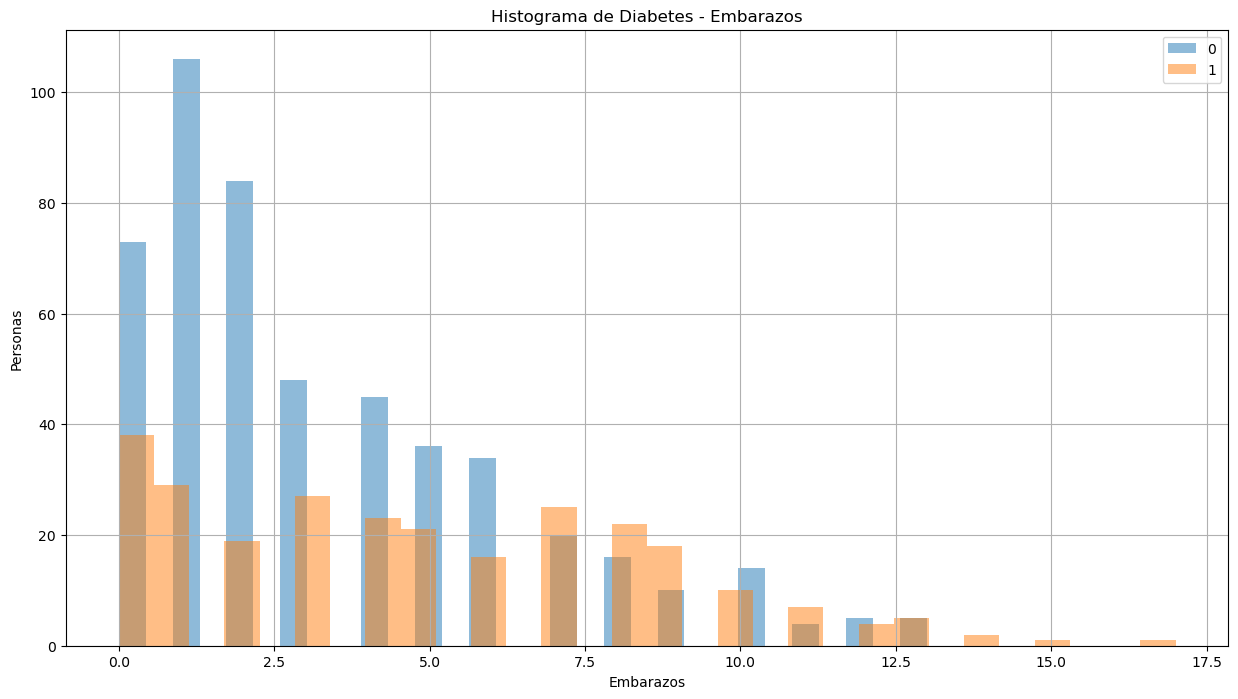

In [51]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

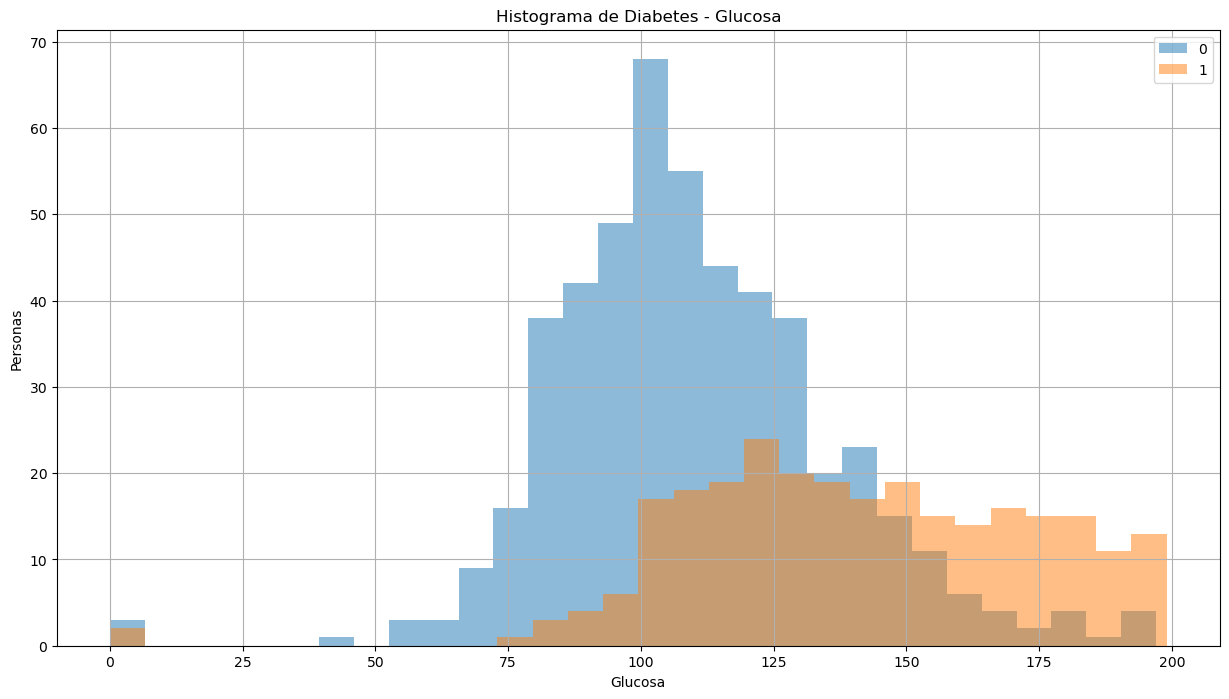

In [52]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

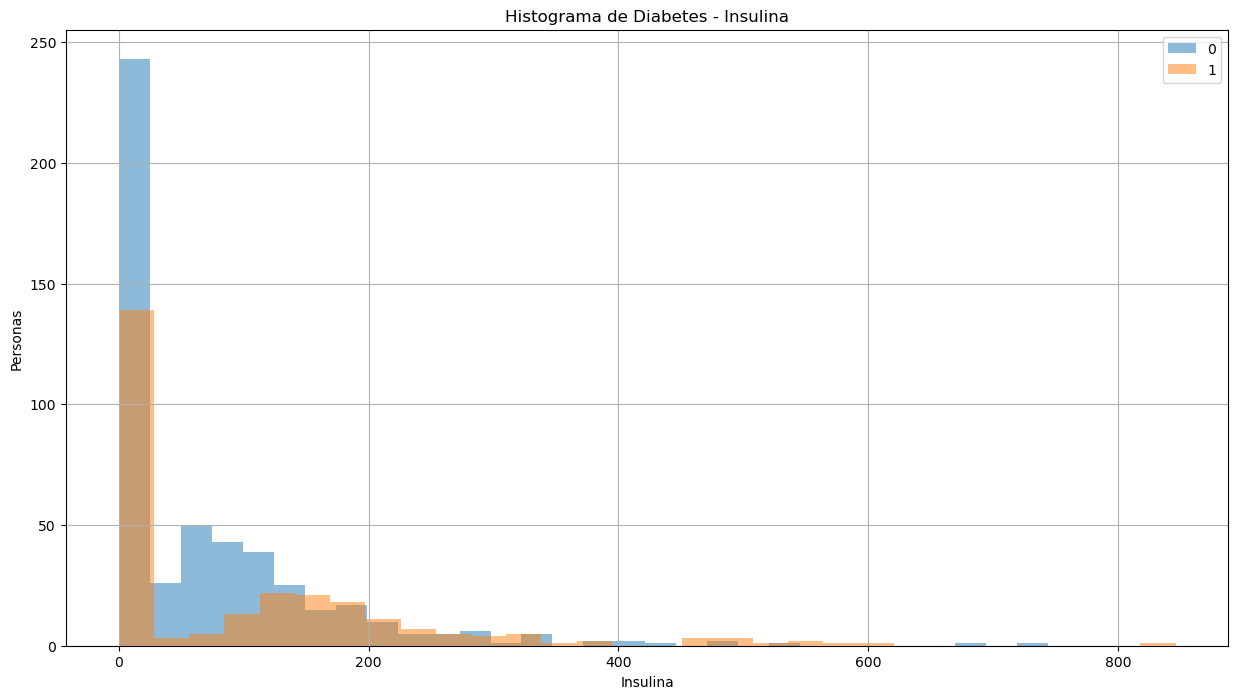

In [53]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

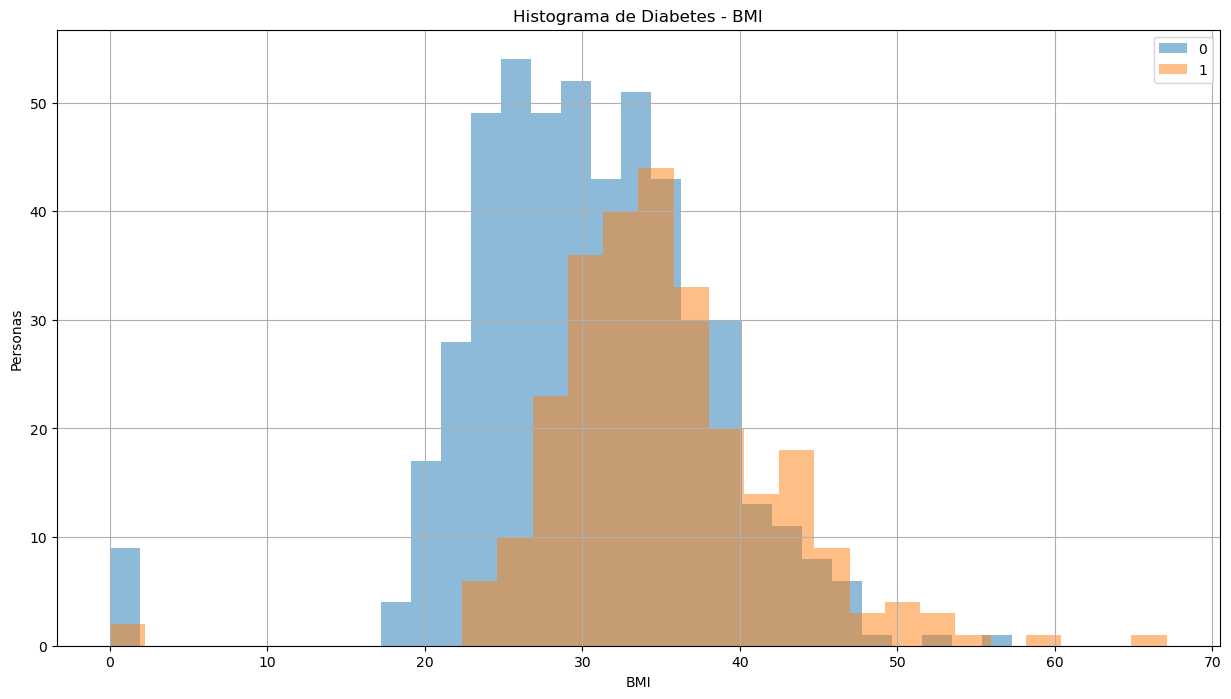

In [54]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

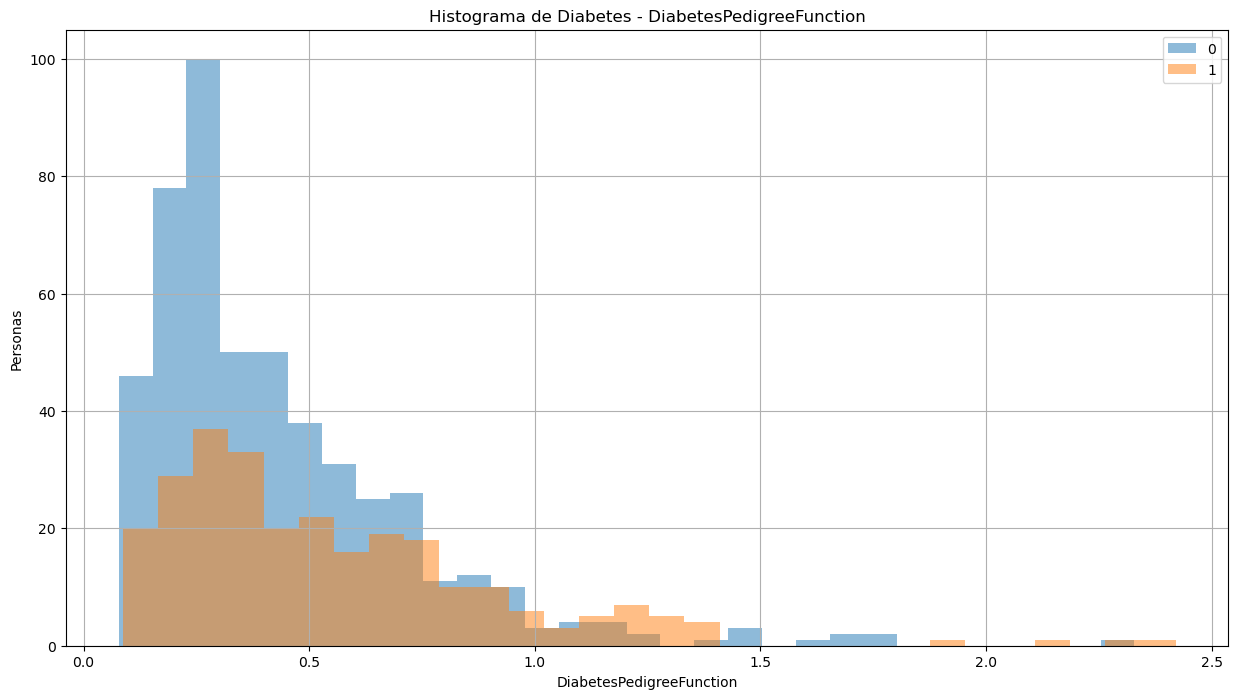

In [55]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

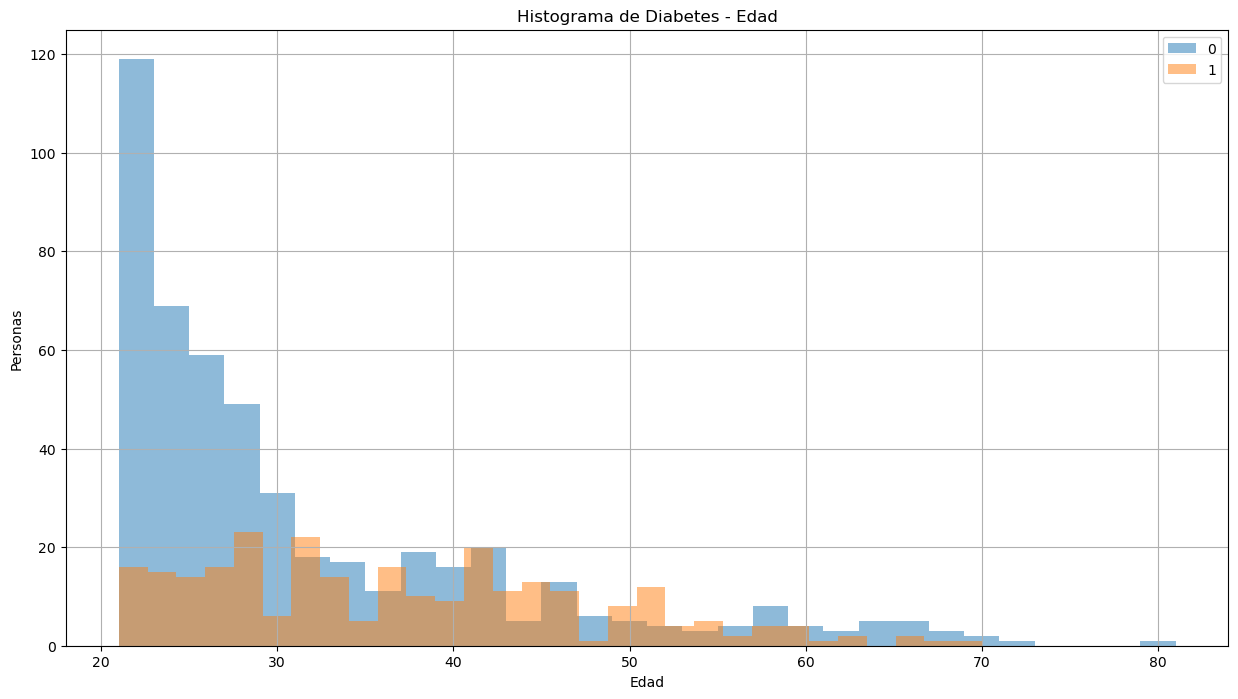

In [56]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

## Eliminación de outliers y división del dataset
Se procede a hacer uso de IQR, el rango intercuartil (IQR) es la diferencia entre el percentil 75 y el 25 de los datos. Es una medida de dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a valores atípicos. Posteriormente, se hace un shuffle de la data para asegurar una mayor distribución y se divide el dataset en un 80% training y 20% testing. 

In [57]:
# Calcula el IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identifica los outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Encuentra las filas que tienen al menos un outlier
outliers_indices = outliers.any(axis=1)

# Muestra las filas con outliers
print("Filas con outliers:")
print(data[outliers_indices])

# Elimina los outliers
data_sin_outliers = data[~outliers_indices]

# Muestra el conjunto de datos sin outliers
print("Data sin outliers:")
print(data_sin_outliers)

Filas con outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  

In [58]:
# Antes de dividir los datos, barajamos el dataset de forma aleatoria para mayor diversidad de datos
dataset_shuffled = shuffle(data_sin_outliers, random_state=20)  # random_state para reproducibilidad
# random_state = 50 malos resultados en el modelo || random_state = 20 buenos resultados en el modelo

# Dividir los datos en conjunto de entrenamiento y prueba
p_train = 0.8  # Porcentaje de training set
train_index = int(len(dataset_shuffled) * p_train)

dataFrameTraining = dataset_shuffled[:train_index]

dataFrameTesting = dataset_shuffled[train_index:]

print("Ejemplos usados para entrenar: ", len(dataFrameTraining))
print("Ejemplos usados para test: ", len(dataFrameTesting))

Ejemplos usados para entrenar:  511
Ejemplos usados para test:  128


In [59]:
def printAccGraph(lst):
    acc = []
    for i in range(0, len(lst)):
        acc.append(lst[i]['acc'])
    plt.plot(acc)
    plt.title('Accuracy')
    plt.xlabel('Iteraciones')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

def printPrecGraph(lst):
    prec = []
    for i in range(0, len(lst)):
        prec.append(lst[i]['prec'])
    plt.plot(prec)
    plt.title('Precision')
    plt.xlabel('Iteraciones')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

def printRecGraph(lst):
    rec = []
    for i in range(0, len(lst)):
        rec.append(lst[i]['rec'])
    plt.plot(rec)
    plt.title('Recall')
    plt.xlabel('Iteraciones')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

def printF1Graph(lst):
    f1 = []
    for i in range(0, len(lst)):
        f1.append(lst[i]['f1'])
    plt.plot(f1)
    plt.title('F1')
    plt.xlabel('Iteraciones')
    plt.ylabel('F1')
    plt.grid(True)
    plt.show()

def printAucGraph(lst):
    auc = []
    for i in range(0, len(lst)):
        auc.append(lst[i]['auc'])
    plt.plot(auc)
    plt.title('AUC')
    plt.xlabel('Iteraciones')
    plt.ylabel('AUC')
    plt.grid(True)
    plt.show()

## KNN y metricas del KNN

k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
k = 66 || AUC = 0.7027027027027027 || Precision = 1.0 || Recall = 0.40540540540540543 || F1 = 0.5769230769230769 || Accuracy = 0.828125
k = 3 || AUC = 0.7393822393822393 || Precision = 0.6388888888888888 || Recall = 0.6216216216216216 || F1 = 0.6301369863013699 || Accuracy = 0.7890625
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375
k = 53 || AUC = 0.7647757647757648 || Precision = 0.9523809523809523 || Recall = 0.5405405405405406 || F1 = 0.6896551724137931 || Accuracy = 0.859375


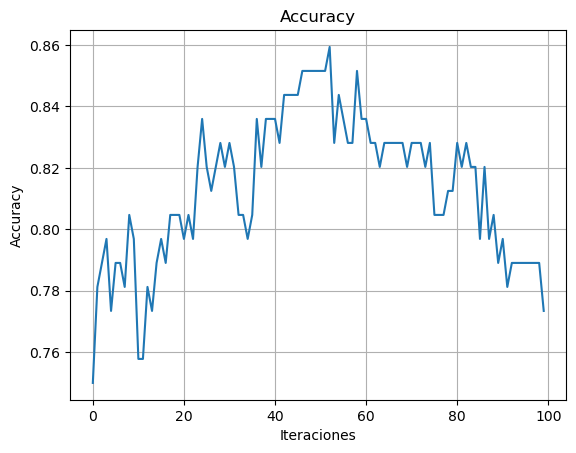

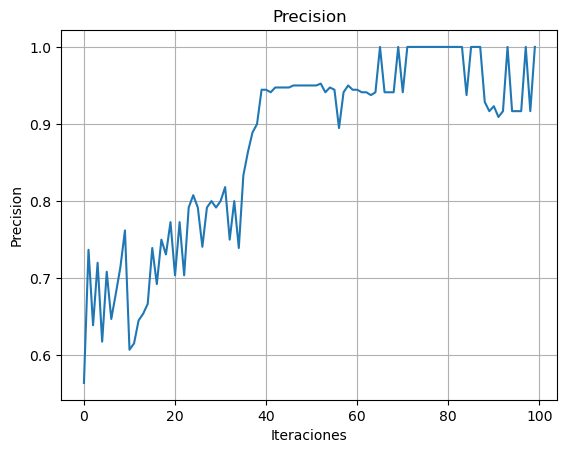

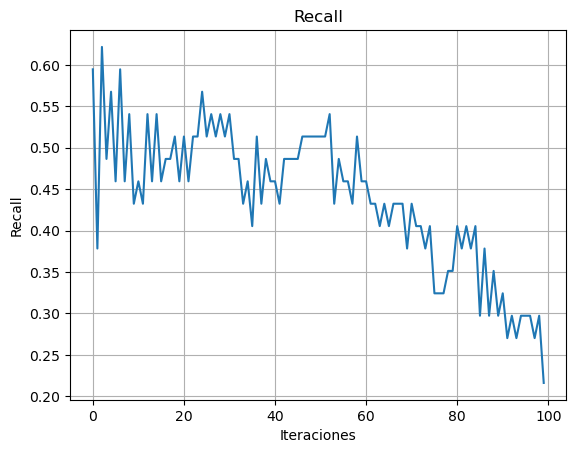

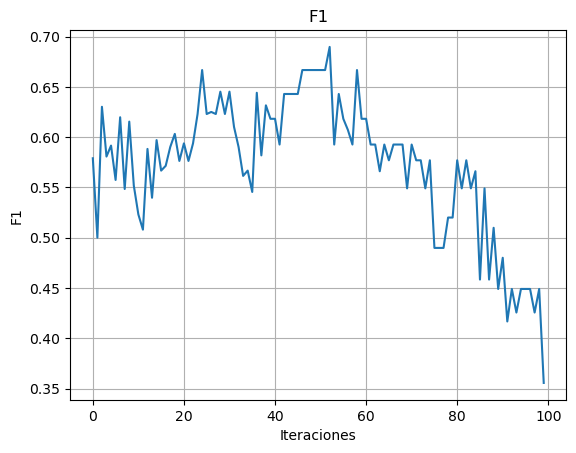

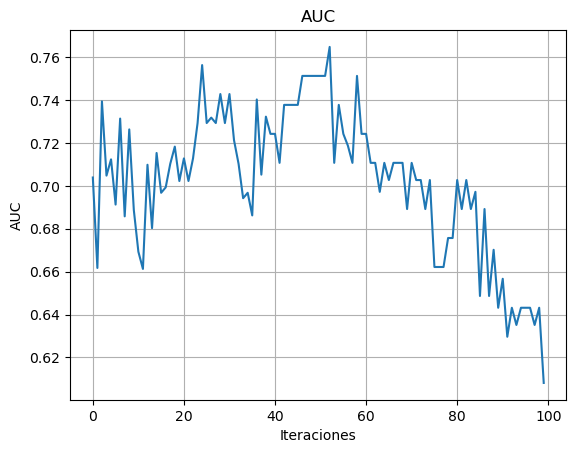

'plt.plot(roc[0], roc[1], label=f"K = {i}")\nplt.xlabel("False Positive Rate")\nplt.ylabel("True Positive Rate")\nplt.title("ROC Curve")\nplt.grid(True)\nplt.legend()\nplt.show()'

In [60]:
x_train = dataFrameTraining[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y_train = dataFrameTraining['Outcome']

x_test = dataFrameTesting[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y_test = dataFrameTesting['Outcome']

lst = []

for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lst.append({"k": i, "acc": acc, "prec": prec, "rec": rec, "f1": f1, "auc": auc, "roc": roc})


maxAuc = max(lst, key=lambda x:x['auc'])
maxPrec = max(lst, key=lambda x:x['prec'])
maxRec = max(lst, key=lambda x:x['rec'])
maxF1 = max(lst, key=lambda x:x['f1'])
maxAcc = max(lst, key=lambda x:x['acc'])

print(f"k = {maxAuc['k']} || AUC = {maxAuc['auc']} || Precision = {maxAuc['prec']} || Recall = {maxAuc['rec']} || F1 = {maxAuc['f1']} || Accuracy = {maxAuc['acc']}")
print(f"k = {maxPrec['k']} || AUC = {maxPrec['auc']} || Precision = {maxPrec['prec']} || Recall = {maxPrec['rec']} || F1 = {maxPrec['f1']} || Accuracy = {maxPrec['acc']}")
print(f"k = {maxRec['k']} || AUC = {maxRec['auc']} || Precision = {maxRec['prec']} || Recall = {maxRec['rec']} || F1 = {maxRec['f1']} || Accuracy = {maxRec['acc']}")
print(f"k = {maxF1['k']} || AUC = {maxF1['auc']} || Precision = {maxF1['prec']} || Recall = {maxF1['rec']} || F1 = {maxF1['f1']} || Accuracy = {maxF1['acc']}")
print(f"k = {maxAcc['k']} || AUC = {maxAcc['auc']} || Precision = {maxAcc['prec']} || Recall = {maxAcc['rec']} || F1 = {maxAcc['f1']} || Accuracy = {maxAcc['acc']}")

printAccGraph(lst)
printPrecGraph(lst)
printRecGraph(lst)
printF1Graph(lst)
printAucGraph(lst)


'''plt.plot(roc[0], roc[1], label=f"K = {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()'''

# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [61]:
data = pd.read_csv('dataset-of-10s.csv')
print("data head")
display(data.head())
print("data info")
display(data.describe())

data head


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


data info


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000
